In [56]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-56-485e6877fc9f>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [58]:
# Load dataset
dataset = pd.read_csv('housing.csv')


In [59]:
len(dataset)

506

In [60]:
# Display basic info
dataset.info()
print("Dataset shape:", dataset.shape)
print("Dataset preview:\n", dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
Dataset shape: (506, 14)
Dataset preview:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0

In [61]:
dataset.shape

(506, 14)

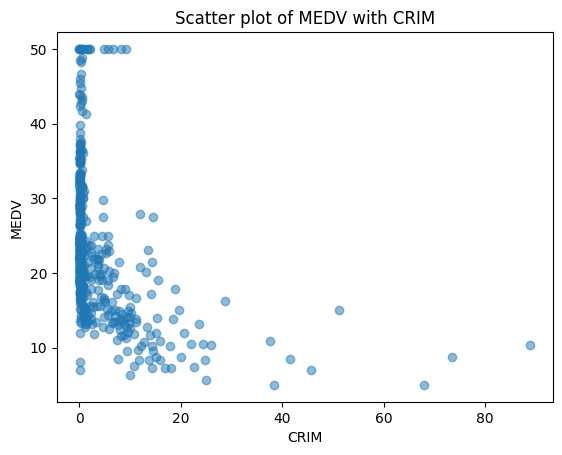

In [62]:
plt.scatter(dataset['CRIM'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with CRIM')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

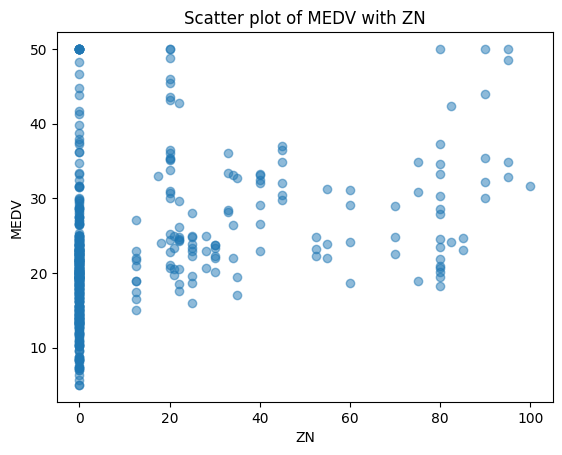

In [63]:
plt.scatter(dataset['ZN'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with ZN')
plt.xlabel('ZN')
plt.ylabel('MEDV')
plt.show()

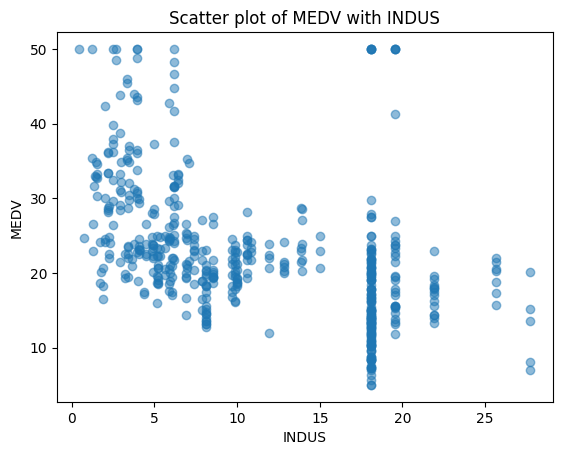

In [64]:
plt.scatter(dataset['INDUS'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with INDUS')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()

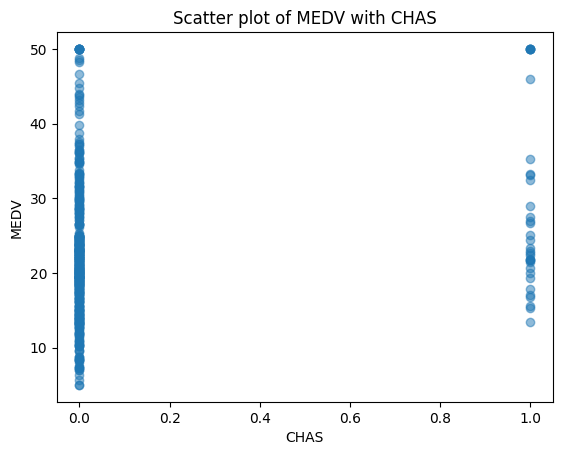

In [65]:
plt.scatter(dataset['CHAS'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with CHAS')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()

In [66]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


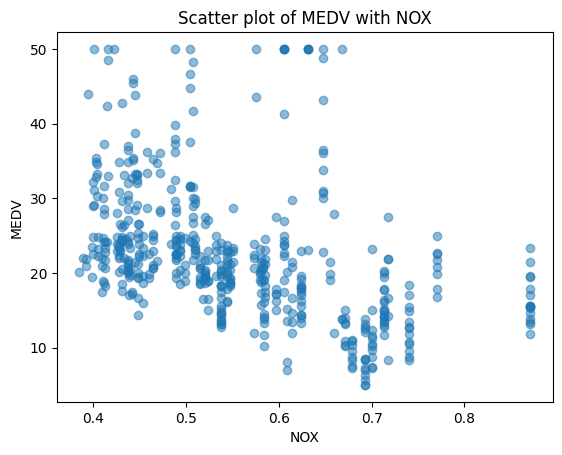

In [67]:
plt.scatter(dataset['NOX'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with NOX')
plt.xlabel('NOX')
plt.ylabel('MEDV')
plt.show()

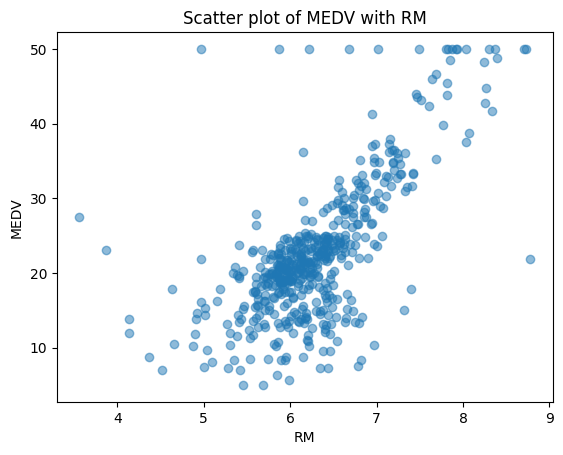

In [68]:
plt.scatter(dataset['RM'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

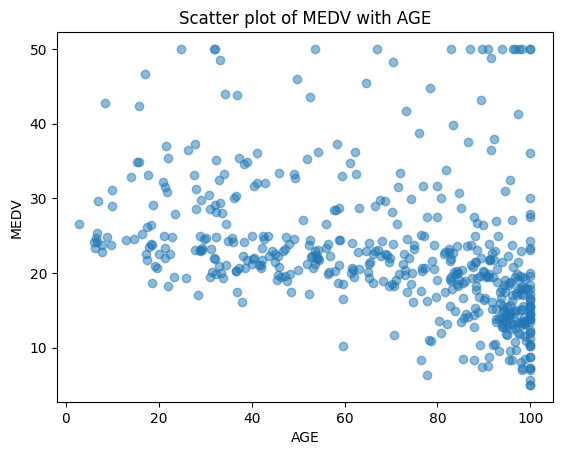

In [69]:
plt.scatter(dataset['AGE'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with AGE')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

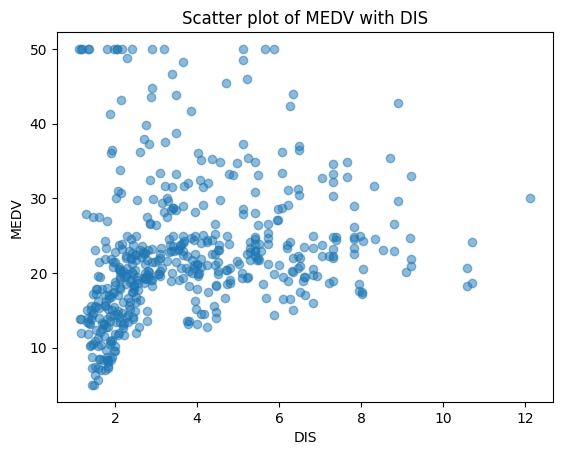

In [70]:
plt.scatter(dataset['DIS'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with DIS')
plt.xlabel('DIS')
plt.ylabel('MEDV')
plt.show()

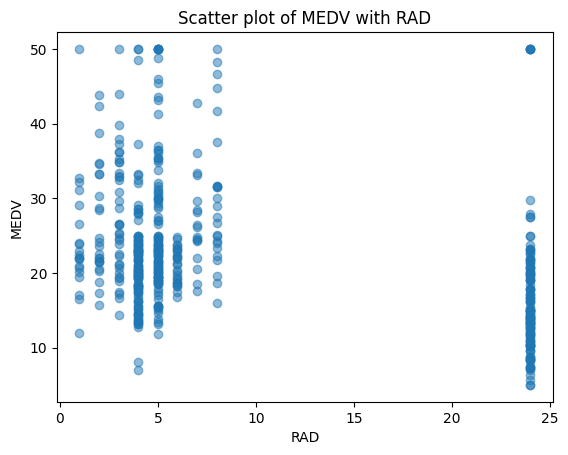

In [71]:
plt.scatter(dataset['RAD'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with RAD')
plt.xlabel('RAD')
plt.ylabel('MEDV')
plt.show()

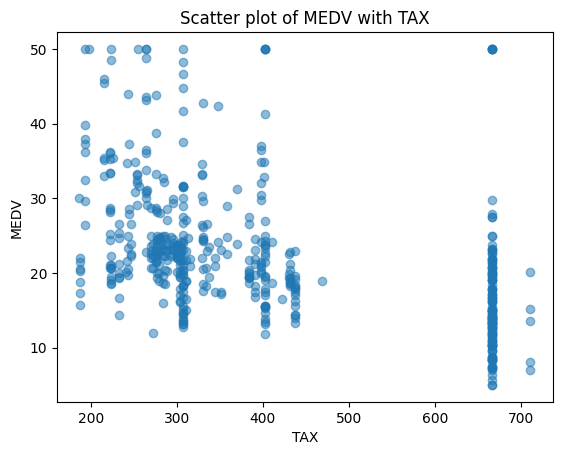

In [72]:
plt.scatter(dataset['TAX'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with TAX')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

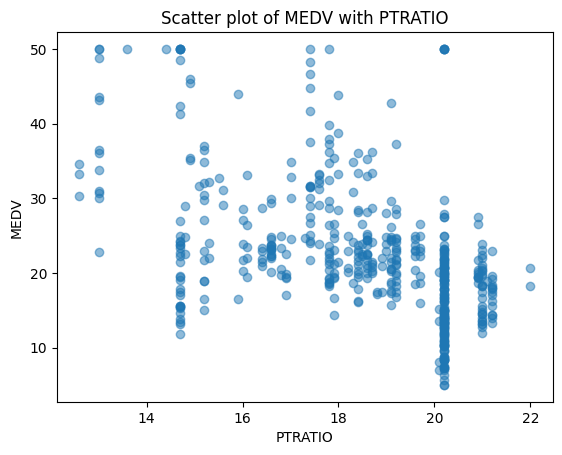

In [73]:
plt.scatter(dataset['PTRATIO'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

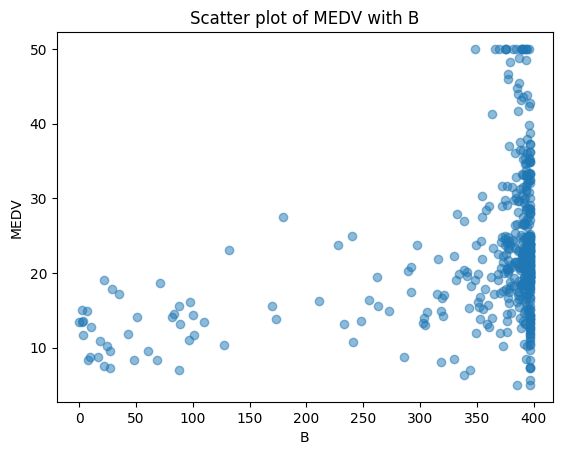

In [74]:
plt.scatter(dataset['B'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with B')
plt.xlabel('B')
plt.ylabel('MEDV')
plt.show()

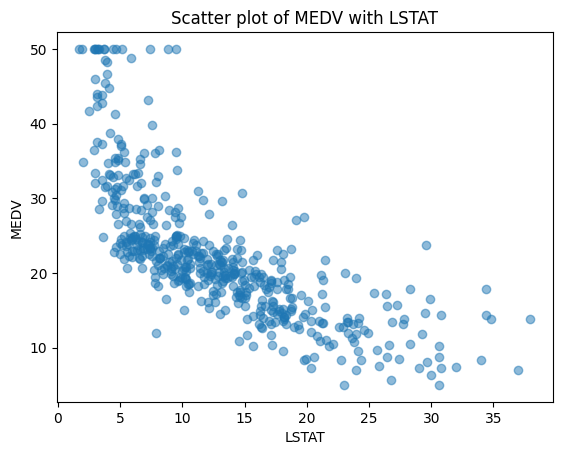

In [75]:
plt.scatter(dataset['LSTAT'], dataset['MEDV'], alpha  = 0.5)
plt.title('Scatter plot of MEDV with LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

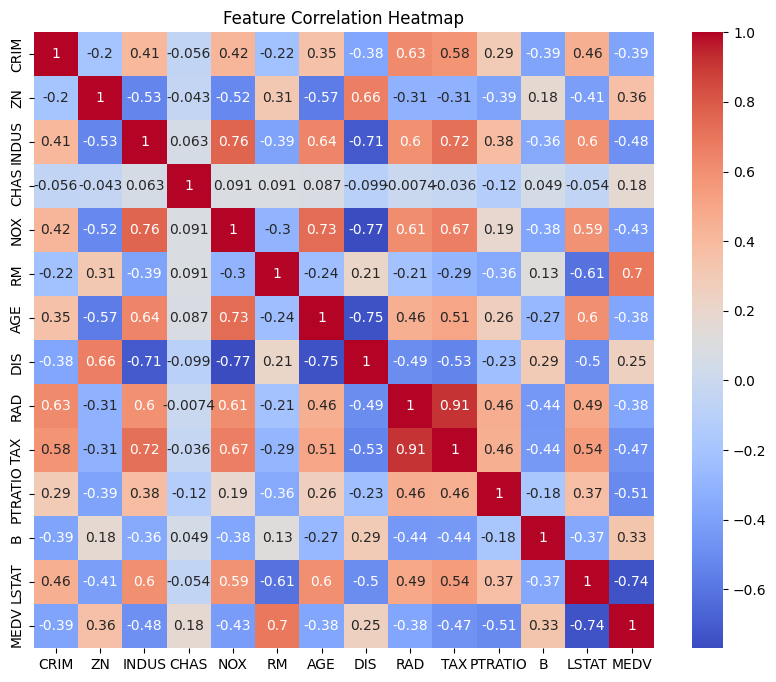

In [76]:
# Check for multicollinearity using correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


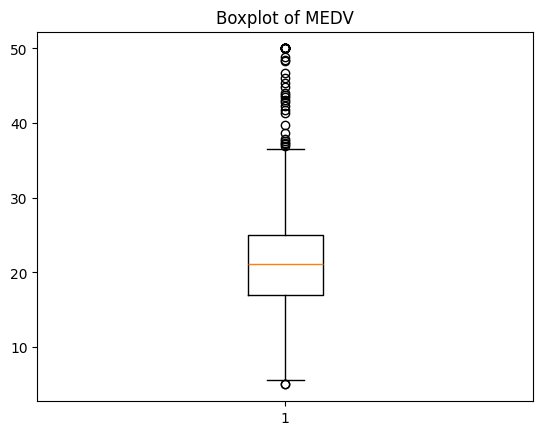

In [77]:
# Remove highly correlated features if necessary (manual step based on heatmap)

# Handling outliers in MEDV (if needed)
plt.boxplot(dataset['MEDV'])
plt.title('Boxplot of MEDV')
plt.show()


In [78]:
dependent_variable = 'MEDV'
independent_variable = list(set(dataset.columns.tolist()) - {dependent_variable})

In [79]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
x = dataset[independent_variable].values
y = dataset[dependent_variable].values

In [81]:
# splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [82]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [83]:
regressor.intercept_

38.091694926302466

In [84]:
regressor.coef_

array([ 2.44178327e-01,  4.47799511e-02,  5.48526168e-03,  3.70870901e+00,
       -1.61236043e+01,  8.11010693e-03, -1.04592119e+00,  2.34080361e+00,
       -1.09896366e-02, -1.19443447e-01, -1.38639737e+00, -4.92792725e-01,
       -3.12108178e-03])

In [85]:
y_pred_train = regressor.predict(x_train)

In [86]:
y_train

array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

In [87]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [88]:
#Predicted profit on the test data
y_pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [89]:
# Actual profits on test data
y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

In [90]:
mean_squared_error(y_test, y_pred)

33.44897999767657

In [91]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

4.396188144698282

In [92]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

5.783509315085138

In [93]:
r2_score(y_train, y_pred_train)

0.7730135569264233